<a href="https://colab.research.google.com/github/Rakshanax/Hashtags-and-Image-Recommendation/blob/main/CIP_HashtagRecommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING 

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
!pip install pexels_api

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import re   #re = regular expression
from pexels_api import API
from PIL import Image
import requests
import shutil
import math
from io import BytesIO
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MultiLabelBinarizer
import random

In [ ]:
data = pd.read_csv("/content/gdrive/My Drive/TweetsDatasetFinal.csv")
print(data)

          id                                 message to examine  \
0          1                            @markhardy1974 Me too     
1          2  @machineplay I'm so sorry you're having to go ...   
2          3  I activated my Selfcontrol block early, meanin...   
3          4  @goodlaura What about Reese dying on ? And sea...   
4          5              My man crush Jake Peavy let me down     
...      ...                                                ...   
21575  21576  Thanks for    @GfWarrior @AuthorofPatches @MKR...   
21576  21577  @rapidbi  because he sends out cool stuff..hur...   
21577  21578  @cc_chapman Re your retweet about who 2 follow...   
21578  21579  @EstrellaBella10 Looks like someone read the h...   
21579  21580   because he is as sick in the head as I am (an...   

                 hashtags  
0                ['#itm']  
1        ['#therapyfail']  
2                 ['#fb']  
3        ['#TTSC', '#24']  
4        ['#gayforpeavy']  
...                   ...  

# DATA PREPROCESSING

**CHARACTER NORMALIZATION**

**CASE CONVERSION**

In [ ]:
data['message to examine'] = data['message to examine'].str.lower()
data['hashtags'] = data['hashtags'].str.lower()
print(data)

          id                                 message to examine  \
0          1                            @markhardy1974 me too     
1          2  @machineplay i'm so sorry you're having to go ...   
2          3  i activated my selfcontrol block early, meanin...   
3          4  @goodlaura what about reese dying on ? and sea...   
4          5              my man crush jake peavy let me down     
...      ...                                                ...   
21575  21576  thanks for    @gfwarrior @authorofpatches @mkr...   
21576  21577  @rapidbi  because he sends out cool stuff..hur...   
21577  21578  @cc_chapman re your retweet about who 2 follow...   
21578  21579  @estrellabella10 looks like someone read the h...   
21579  21580   because he is as sick in the head as i am (an...   

                 hashtags  
0                ['#itm']  
1        ['#therapyfail']  
2                 ['#fb']  
3        ['#ttsc', '#24']  
4        ['#gayforpeavy']  
...                   ...  

**FILTRATION**

**URL Removal**

In [ ]:
data['message to examine'] = data['message to examine'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','')
data['message to examine'] = data['message to examine'].str.replace('[a-z]+.com([/]?[a-z]*)*','')
print(data)

          id                                 message to examine  \
0          1                            @markhardy1974 me too     
1          2  @machineplay i'm so sorry you're having to go ...   
2          3  i activated my selfcontrol block early, meanin...   
3          4  @goodlaura what about reese dying on ? and sea...   
4          5              my man crush jake peavy let me down     
...      ...                                                ...   
21575  21576  thanks for    @gfwarrior @authorofpatches @mkr...   
21576  21577  @rapidbi  because he sends out cool stuff..hur...   
21577  21578  @cc_chapman re your retweet about who 2 follow...   
21578  21579  @estrellabella10 looks like someone read the h...   
21579  21580   because he is as sick in the head as i am (an...   

                 hashtags  
0                ['#itm']  
1        ['#therapyfail']  
2                 ['#fb']  
3        ['#ttsc', '#24']  
4        ['#gayforpeavy']  
...                   ...  

<ipython-input-7-a9fb1c6ddf01>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['message to examine'] = data['message to examine'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','')
<ipython-input-7-a9fb1c6ddf01>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['message to examine'] = data['message to examine'].str.replace('[a-z]+.com([/]?[a-z]*)*','')


**Stop word Removal**

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
data.dropna(subset=['message to examine'], inplace=True)
stop = stopwords.words('english')
data['message to examine'] = data['message to examine'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
print(data['message to examine'])

0                                           @markhardy1974
1                   @machineplay i'm sorry go this. again.
2        activated selfcontrol block early, meaning can...
3        @goodlaura reese dying ? season finale next we...
4                                 man crush jake peavy let
                               ...                        
21575    thanks @gfwarrior @authorofpatches @mkrob @rem...
21576           @rapidbi sends cool stuff..hurry sundown!!
21577    @cc_chapman retweet 2 follow that's great thin...
21578    @estrellabella10 looks like someone read handb...
21579    sick head (and whining get tagged fridays) @an...
Name: message to examine, Length: 21559, dtype: object


**Punctuation Stripping**

In [ ]:
data['message to examine'] = data['message to examine'].str.replace(r"[\"\'\!\(\)\-\[\]\{\}\;\:\\\,\<\>\.\/\?\#\$\%\^&\*\_\~\+\=\-\_]",'')
print(data)

          id                                 message to examine  \
0          1                                     @markhardy1974   
1          2                @machineplay im sorry go this again   
2          3  activated selfcontrol block early meaning cant...   
3          4  @goodlaura reese dying  season finale next wee...   
4          5                           man crush jake peavy let   
...      ...                                                ...   
21575  21576  thanks @gfwarrior @authorofpatches @mkrob @rem...   
21576  21577             @rapidbi sends cool stuffhurry sundown   
21577  21578  @ccchapman retweet 2 follow thats great things...   
21578  21579  @estrellabella10 looks like someone read handb...   
21579  21580  sick head and whining get tagged fridays @anto...   

                 hashtags  
0                ['#itm']  
1        ['#therapyfail']  
2                 ['#fb']  
3        ['#ttsc', '#24']  
4        ['#gayforpeavy']  
...                   ...  

<ipython-input-11-99c3dd4dd29b>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['message to examine'] = data['message to examine'].str.replace(r"[\"\'\!\(\)\-\[\]\{\}\;\:\\\,\<\>\.\/\?\#\$\%\^&\*\_\~\+\=\-\_]",'')


**Digit Removal**

In [ ]:
data['message to examine'] = data['message to examine'].str.replace(r'[0-9]','')
print(data)

          id                                 message to examine  \
0          1                                         @markhardy   
1          2                @machineplay im sorry go this again   
2          3  activated selfcontrol block early meaning cant...   
3          4  @goodlaura reese dying  season finale next wee...   
4          5                           man crush jake peavy let   
...      ...                                                ...   
21575  21576  thanks @gfwarrior @authorofpatches @mkrob @rem...   
21576  21577             @rapidbi sends cool stuffhurry sundown   
21577  21578  @ccchapman retweet  follow thats great things ...   
21578  21579  @estrellabella looks like someone read handboo...   
21579  21580  sick head and whining get tagged fridays @anto...   

                 hashtags  
0                ['#itm']  
1        ['#therapyfail']  
2                 ['#fb']  
3        ['#ttsc', '#24']  
4        ['#gayforpeavy']  
...                   ...  

<ipython-input-12-c47fc06452ed>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['message to examine'] = data['message to examine'].str.replace(r'[0-9]','')


In [ ]:
# data.to_csv('/content/gdrive/My Drive/Preprocessed.csv', index=False)

# FUNCTION ENHANCEMENT

**TWEETS SIMILARITY**

In [ ]:
#Computing Inverse Document Frequency (IDF) score for all the words in the tweet

In [ ]:
def similar_tweets(t):

  #splitting the tweet into words
  words = t.split()

  #finding unique words and storing in a dictionary 
  unique = {}
  for word in words:
      if word not in unique.keys():
          unique[word] = 0
  # print ("\nInitial dictionary\n", unique)

  #counting the frequency of each word in the dictionary
  for term in unique.keys():
    for i in range(len(data['message to examine'])):
      if term in data.iat[i,1]:
        #increment number of documents with the term in it
        unique[term] +=1 
    #idf score = log(Total number of documents / Number of documents with the term in it)
    idf_score = math.log(len(data['message to examine'])/unique[term]) 
    unique[term] = idf_score
  # print("\nDictionary with updated idf_scores\n", unique)

  #sorting the dictionary according to highest idf_score
  value_key_pairs = ((value, key) for (key,value) in unique.items())
  sorted_value_key_pairs = sorted(value_key_pairs, reverse=True)  
  unique = {k: v for v, k in sorted_value_key_pairs}

  # print("\nSorted dictionary\n", unique)
  similarTweets = pd.DataFrame()

  #retreiving tweets with any of the top 3 scoring words
  n = min(len(unique),3)
  for x in range(n):
    tempDf = data[data['message to examine'].str.contains(list(unique)[x])]
    similarTweets = pd.concat([similarTweets,tempDf]).drop_duplicates(keep='first')
  # print(similarTweets)
  return similarTweets

In [ ]:
 recommendations.to_csv('/content/gdrive/My Drive/Narrowed.csv', index=False)

AttributeError: ignored

**TOKEN WEIGHTS**

In [ ]:
#Computing the weight of the words

In [ ]:
def wordweight(word):
    if '@' in word:
       weight = 3
    else:
      weight = 1
      l = len(word)
      weight += l*0.1 
    return weight  

# FEATURE OPTIMIZATION

In [ ]:
weight_hashes = {}
weight_hash = {}

for tweet in data['message to examine']:
    weight_hsh = {}
    wordtemp = tweet.split()
    
    for w in wordtemp:
        if w not in weight_hsh:
            weight_hsh[w] = wordweight(w)
        
        if w not in weight_hash:
            weight_hash[w] = wordweight(w)
    
    weight_hashes[tweet] = weight_hsh

# Print the keys and their respective values for a given row
row_index = 2
row_tweet = data['message to examine'][row_index]

if row_tweet in weight_hashes:
    row_hashmap = weight_hashes[row_tweet]
    print("Tweet:", row_tweet)
    
    for key, value in row_hashmap.items():
        print(f"Key: {key}, Value: {value}")
else:
    print("Tweet not found in weight_hashes dictionary")
print("Weight Hashmap")
print(weight_hash)

Tweet: activated selfcontrol block early meaning cant check new qc regularizing internal clock might difficult
Key: activated, Value: 1.9
Key: selfcontrol, Value: 2.1
Key: block, Value: 1.5
Key: early, Value: 1.5
Key: meaning, Value: 1.7000000000000002
Key: cant, Value: 1.4
Key: check, Value: 1.5
Key: new, Value: 1.3
Key: qc, Value: 1.2
Key: regularizing, Value: 2.2
Key: internal, Value: 1.8
Key: clock, Value: 1.5
Key: might, Value: 1.5
Key: difficult, Value: 1.9
Weight Hashmap
{'@markhardy': 3, '@machineplay': 3, 'im': 1.2, 'sorry': 1.5, 'go': 1.2, 'this': 1.4, 'again': 1.5, 'activated': 1.9, 'selfcontrol': 2.1, 'block': 1.5, 'early': 1.5, 'meaning': 1.7000000000000002, 'cant': 1.4, 'check': 1.5, 'new': 1.3, 'qc': 1.2, 'regularizing': 2.2, 'internal': 1.8, 'clock': 1.5, 'might': 1.5, 'difficult': 1.9, '@goodlaura': 3, 'reese': 1.5, 'dying': 1.5, 'season': 1.6, 'finale': 1.6, 'next': 1.4, 'week': 1.4, 'boring': 1.6, 'madame': 1.6, 'president': 1.9, 'crazy': 1.5, 'woman': 1.5, 'man': 1.

# TAG GENERATION

# NAIVE BAYES CLASSIFIER



**NAIVE BAYES CLASSIFIER**

In [ ]:
def nbclassify(tweet, simtweets):
  # temp = similar_tweets(tweet)
  T = simtweets.loc[:,['id','message to examine']]
  H = simtweets.loc[:,['id','hashtags']]
  classifications = []
  W = tweet.split()
  for t,i in zip(T['message to examine'],T['id']):
    wordtemp = t.split()
    hashtag = H.loc[i-1, 'hashtags']  
    hashtagslist = hashtag.strip("[]").split(", ")
    for h in hashtagslist:
      score = 0
      for w in W:
        if w in wordtemp:
          score += prob(w,T,H) * weight_hash[w]
      classifications.append([h,score])    
  # print("\nCLASSIFICATIONS:\n",classifications)
  classif = getHighestScores(classifications, 3)
  # print("\nTop Hashtags : \n",classif)
  return classif


# Function to calculate the probability 
def prob(w,T,H):
  total = 0
  hash = {}
  for t,i in zip(T['message to examine'], T['id']):
    wordtemp = t.split()
    if w in wordtemp:
      tweethashtag = H.loc[i-1, 'hashtags'] 
      hashtags_list = tweethashtag.strip("[]").split(", ")
      total += len(hashtags_list)   #total number of hashtags in the similar tweets
      for h in hashtags_list:
        if h not in hash:
          hash[h]=1
  nhw=len(hash)
  probabilty = nhw/total
  return (probabilty)

# Function to get K items with highest score
def getHighestScores(cls, k):
  return sorted(cls, key=lambda x: x[1], reverse=True)[:k]

#KNN CLASSIFIER

**KNN CLASSIFIER**

In [ ]:
def column(matrix, i):
  return [row[i] for row in matrix]


def knnclassify(tweet, simtweets): 
  T = simtweets.loc[:,['id','message to examine']]
  H = simtweets.loc[:,['id','hashtags']]
  # print("No of similar tweets : ",len(T))

  W = tweet.split()
  neighbours = []

  # Calculate scores for each tweet in the similar tweets list
  for t,i in zip(T['message to examine'],T['id']):
    score = 0
    wordstemp = t.split()
    for w in W:
      if w in wordstemp:
        score += tcor(w,T,H) * weight_hash[w]
    if score != 0:
      neighbours.append([i,t,score])
  # print("\nNeighbours:\n", neighbours)
  # print("\nNo of neighbours : ",len(neighbours))

  #Get K tweets with highest_scores
  nearest_neighbours = getHighestScores(neighbours, 30) #k=30
  # print("\nNearest_neighbors:\n",nearest_neighbours)
  # print("\nNo of nearest neighbours : ",len(nearest_neighbours),"\n")
  
  # Map hashtags to count
  classifications = { }
  for t,i in zip(column(nearest_neighbours,1),column(nearest_neighbours,0)):
    hashtag = H.loc[i-1, 'hashtags']
    hashtagslist = hashtag.strip("[]").split(", ")
    for h in hashtagslist:
      if h in classifications:
        classifications[h]+=1
      else:
        classifications[h]=1
  # print("\n",classifications)

  #get top hashtags
  classifications = getHighestScores(classifications.items(), 3) #n=3 hashtags
  # print("\nTop Hashtags : \n",classifications)
  return(classifications)


def tcor(w,T,H):
  TotalWordsCount=0
  WordTweetCount=0
  hash = {}
  for t,i in zip(T['message to examine'], T['id']):
    wordtemp = t.split()
    TotalWordsCount+=len(wordtemp)
    WordTweetCount+=wordtemp.count(w)
    if w in wordtemp:
      tweethashtag = H.loc[i-1, 'hashtags'] 
      hashtags_list = tweethashtag.strip("[]").split(", ")
      for h in hashtags_list:
        if h not in hash:
          hash[h]=1
  #number of hashtags the word co-occurs with
  cw=len(hash)
  #average number of words in Tweets containing the word
  fl = WordTweetCount/TotalWordsCount
  tcor_score = ((1/fl)+(1/cw))/2
  return(tcor_score)


# Function to get K items with highest score
def getHighestScores(neighbours, k):
  return sorted(neighbours, key=lambda x: x[1], reverse=True)[:k]

**EVALUATION OF NAIVE BAYES CLASSIFIER AND KNN CLASSIFIER**

In [ ]:
nbcorrect=0
knncorrect=0
n =  len(data)
# n = 1200
for i in range(n):
  twt = data.iat[i,1] 
  originalhash = data.iat[i,2]
  orghashlist = originalhash.strip("[]").split(", ")
  similartweets = similar_tweets(twt)

  nbhashtags = nbclassify(twt,similartweets)
  knnhash = knnclassify(twt,similartweets)

  nbcount=0
  knncount=0

  for htag in orghashlist:
    for nb in range(len(nbhashtags)):
      if(nbhashtags[nb][0] == htag):
        nbcount+=1
    for kn in knnhash:
      if(kn[0] == htag):
        knncount+=1

  if(nbcount>0):
    nbcorrect+=1
    # print("nb correct")
  if(knncount>0):
    knncorrect+=1
    # print("knn correct")

nbaccuracy = (nbcorrect/n)*100
knnaccuracy = (knncorrect/n)*100

print("Naive bayes classifier accuracy: ", nbaccuracy, "\nKNN classifier accuracy: ", knnaccuracy)

Naive bayes classifier accuracy:  45.0 
KNN classifier accuracy:  37.0


**SVM**

In [ ]:
# Convert text data to numerical features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['message to examine'])

hashtags = data['hashtags'].apply(lambda x: x.strip('[]').replace("'", "").split(", "))
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(hashtags)
y = y.argmax(axis=1)  # convert to a 1-dimensional array

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a SVM model with linear kernel
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("SVM accuracy:", accuracy*100)

SVM accuracy: 6.915142991092359


**RF CLASSIFIER**

In [ ]:
tfidf_vectorizer = TfidfVectorizer()

X = tfidf_vectorizer.fit_transform(data['message to examine'])

hashtags = data['hashtags'].apply(lambda x: x.strip('[]').replace("'", "").split(", "))
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(hashtags)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=10, random_state=42)

In [ ]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("RF accuracy:", accuracy*100)

RF accuracy: 5.6020017201992


# HYBRID CLASSIFIER

**HYBRID CLASSIFIER**

In [ ]:
n1 = random.randint(0, len(data))
print(n1)
n2=n1+30
print(n2)

15400
15430


In [ ]:
def hybridclassifier(nbhashtags, knnhashtags):
  recommendations = { }
  for nb in range(len(nbhashtags)):
    recommendations[nbhashtags[nb][0]] = 0.7 * nbhashtags[nb][1]
  for kn in knnhashtags:
    if kn[0] in recommendations:
      recommendations[kn[0]] += 0.3 * kn[1]
    else:
      recommendations[kn[0]] = 0.3 * kn[1]

  recommendations = getHighestScores(recommendations.items(), 2)
  return(recommendations)

In [ ]:
hybcorrect=0
n =  len(data)
# n = 1200
for i in range(n):
  twt = data.iat[i,1] 
  originalhash = data.iat[i,2]
  orghashlist = originalhash.strip("[]").split(", ")

  similartweets = similar_tweets(twt)
  nbhashtags = nbclassify(twt,similartweets)
  knnhashtags = knnclassify(twt,similartweets)
  recommendations = hybridclassifier(nbhashtags, knnhashtags)


In [ ]:
hcount=0
for htag in orghashlist:
  for hybhash in recommendations:
    if(hybhash[0] == htag):
      hcount+=1

  if(hcount>0):
    hybcorrect+=1

hybaccuracy = (hybcorrect/n)*100

print("Hybrid classifier accuracy: ", hybaccuracy)

Hybrid classifier accuracy:  50.0


In [ ]:
for i in range(n1,n2):
  twt = data.iat[i,1]
  print("\nTweet: ", twt)
  simtwt = similar_tweets(twt)
  nbhashtags = nbclassify(twt,simtwt)
  knnhashtags = knnclassify(twt,simtwt)
  recommendations = hybridclassifier(nbhashtags, knnhashtags)
  print("Hashtag recommendations : ")
  for r in recommendations:
    print(r[0])


Tweet:  ok back work although id rather go universal today  degrees weather talk
Hashtag recommendations : 
'#heroes'
'#insomnia'

Tweet:  posted blog needing kick pants check out
Hashtag recommendations : 
'#fb'
'#kauaitrip'

Tweet:  lady gaga still spot hooray  pop music
Hashtag recommendations : 
'#1'
'#followfriday'

Tweet:  @captblackeagle id prefer sea red amp black cant let college town celebration go unnoticed
Hashtag recommendations : 
'#godawgsthereisalwaysfootballseason'
'#starwarsday'

Tweet:  @faceman
Hashtag recommendations : 
'#bludget'

Tweet:  @ryankuder little logic plus little feminine intuition
Hashtag recommendations : 
'#twittertourney'

Tweet:  @scheuguy glad see strongly tagging titling things worked well google alerts
Hashtag recommendations : 
'#sm4scnyc'
'#aspnetmvc'

Tweet:  @nevafeva @raindelay pic us together @stephstricklen
Hashtag recommendations : 
'#pdxmeetup'
'#bcp3'

Tweet:  get load guy @terencesmelser lt afraid speak mind
Hashtag recommendations :

In [ ]:
twt = data.iat[5116,1]
print("\nTweet: ", twt)
simtwt = similar_tweets(twt)
nbhashtags = nbclassify(twt,simtwt)
knnhashtags = knnclassify(twt,simtwt)
  # print("nb: ",nbhashtags, "\nknn:", knnhashtags)

recommendations = { }
for nb in range(len(nbhashtags)):
  recommendations[nbhashtags[nb][0]] = 0.7 * nbhashtags[nb][1]
for kn in knnhashtags:
  if kn[0] in recommendations:
    recommendations[kn[0]] += 0.3 * kn[1]
  else:
    recommendations[kn[0]] = 0.3 * kn[1]

recommendations = getHighestScores(recommendations.items(), 2)
print(recommendations)
print("Hashtag recommendations : ")
for r in recommendations:
  print(r[0])


Tweet:  macbook  battery
[("'#fail'", 2.618776009791922), ("'#wheresmycharger'", 2.018776009791922)]
Hashtag recommendations : 
'#fail'
'#wheresmycharger'


# IMAGE GENERATION

In [ ]:
tweet = data.iat[5116,1]
print(tweet)

# split the tweet into words
words = tweet.split()

# initialize variables to store the top two words
top_word = ''
top_weight = 0
second_word = ''
second_weight = 0

# loop over the words and find the two words with the highest weights
for w in words:
    # ignore words starting with "@"
    if w.startswith('@'):
        continue
    if w in weight_hash:
        weight = weight_hash[w]
        if weight > top_weight:
            second_word = top_word
            second_weight = top_weight
            top_word = w
            top_weight = weight
        elif weight > second_weight:
            second_word = w
            second_weight = weight

# put the two words in an array
top_words = [top_word, second_word]

# print the array of top words
print("Top words:", top_words)


macbook  battery
Top words: ['macbook', 'battery']



Tweet:  macbook  battery
macbook


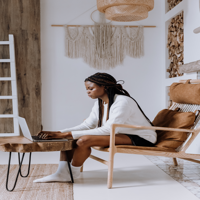

macbook


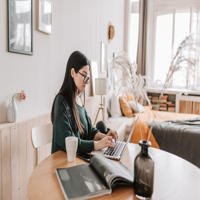

macbook


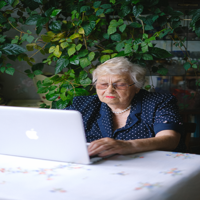

macbook


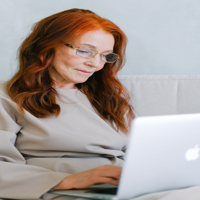

macbook


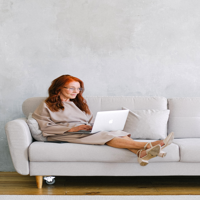

macbook


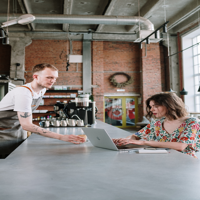

macbook


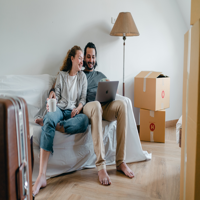

macbook


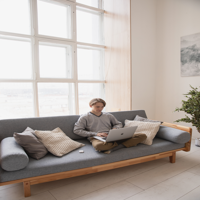

macbook


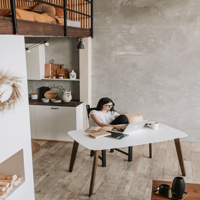

macbook


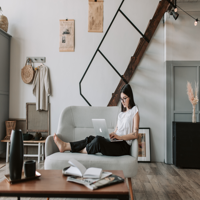

battery


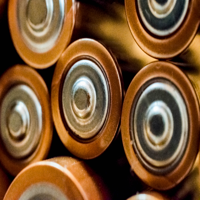

battery


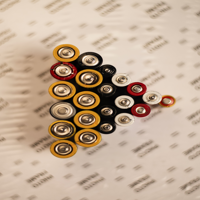

battery


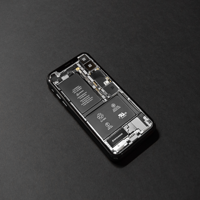

battery


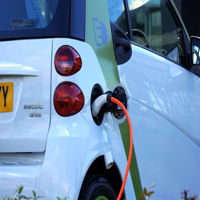

battery


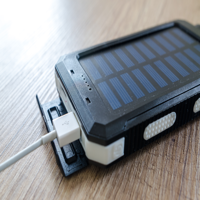

battery


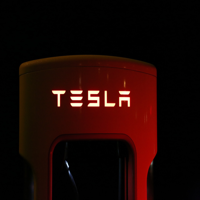

battery


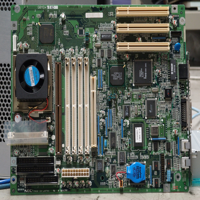

battery


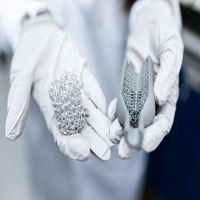

battery


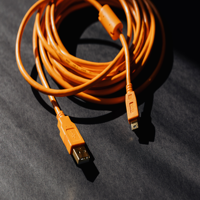

battery


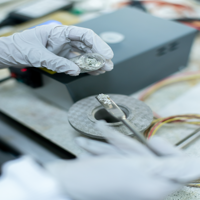

In [ ]:
PEXELS_API_KEY = 'hUGglhXJjJpePpS0Dmbqhr54IEhx074kSwyc3nmlq1GuxgTF4hQ1SiEM' #api key obtained from PEXELS
api = API(PEXELS_API_KEY) 
print("\nTweet: ", tweet)
for x in range(len(top_words)):
  api.search(top_words[x], page=1, results_per_page=10) 
  photos = api.get_entries() 
  for photo in photos:
      print(top_words[x]) 
      response = requests.get(photo.original, stream=True) 
      with open('img.png', 'wb') as out_file: 
          shutil.copyfileobj(response.raw, out_file) 
      del response
      img = Image.open('img.png')
      # Resize the image to a smaller size (e.g., 500x500 pixels)
      img = img.resize((200, 200))
      # Save the resized image to a file
      img.save('resized_img.png')
     
      # Display the resized image
      img.show()
